In [1]:
#
# libraries
#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#

In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 

In [2]:
#
# load data
#
my_data = pd.read_csv('Datasets\\stocks.csv')
my_data.head()
#

,Date,Close,Volume,symbol,sentiment
0,2017-04-17,20636.919922,229240000,S1,NEUTRAL
1,2017-04-17,20.000000,88300,S2,NEUTRAL
2,2017-04-17,5400.000000,0,S3,NEUTRAL
3,2017-04-18,20523.279297,263180000,S1,NEUTRAL
4,2017-04-18,20.150000,60500,S2,NEUTRAL


In [3]:
#
my_data.dtypes
#

Date          object
Close        float64
Volume         int64
symbol        object
sentiment     object
dtype: object

In [4]:
#
# convert Date to a datetime and get the range
#
my_data['Date'] = pd.to_datetime(my_data['Date'])
my_data['Date'].describe()
#

count                     753
unique                    251
top       2017-10-30 00:00:00
freq                        3
first     2017-04-17 00:00:00
last      2018-04-13 00:00:00
Name: Date, dtype: object

In [5]:
#
# since we have one year of data and it is time series
# we'll split the last three monthts as the test set
#
train_end = '2018-01-13'
train = my_data.loc[my_data['Date'] <= train_end, :]
test = my_data.loc[my_data['Date'] > train_end, :]
#

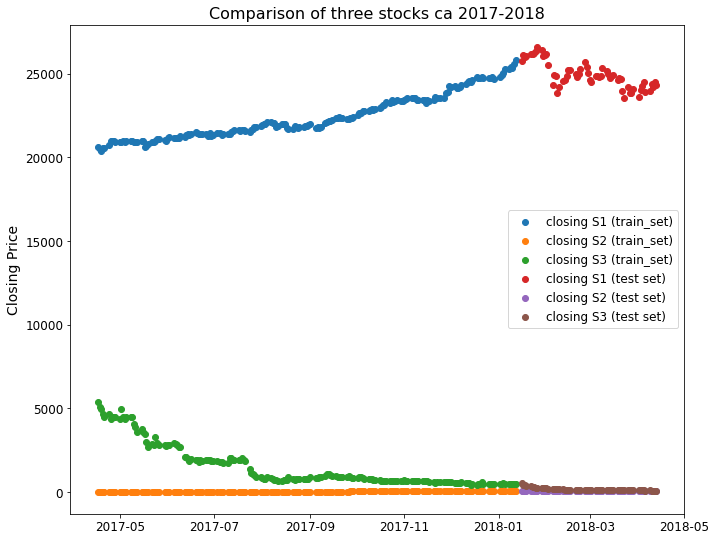

In [6]:
#
# look at these daat vs. time
#
figure, ax = plt.subplots(figsize = (11, 9))
symbols_train = train.groupby('symbol')
symbols_test = test.groupby('symbol')
for train_name, symbol_train in symbols_train:
    ax.scatter(symbol_train.Date, 
               symbol_train.Close, 
               label = 'closing ' + train_name + ' (train_set)')
for test_name, symbol_test in symbols_test:
    ax.scatter(symbol_test.Date, 
               symbol_test.Close, 
               label = 'closing ' + test_name + ' (test set)')
ax.legend(fontsize = 12)
ax.set_ylabel('Closing Price', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Comparison of three stocks ca 2017-2018', 
             fontsize = 16)
plt.show()
#

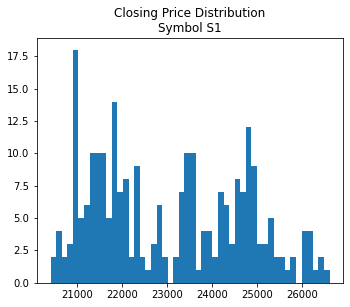

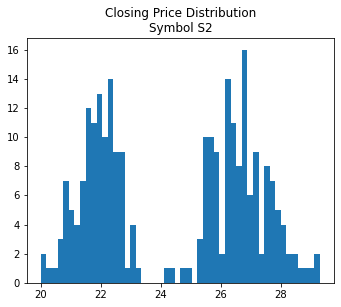

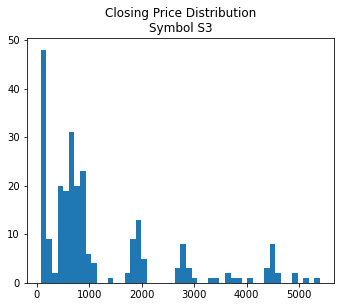

In [7]:
#
# look at the price distributions of each symbol
#
symbols = my_data.symbol.unique()
for i in range(len(symbols)):
    fig, ax = plt.subplots(figsize = (5.5, 4.5))
    ax.hist(my_data.groupby('symbol').get_group(symbols[i])['Close'],
           bins = 50)
    ax.set_title('Closing Price Distribution\nSymbol ' + symbols[i])
    plt.show()
#    

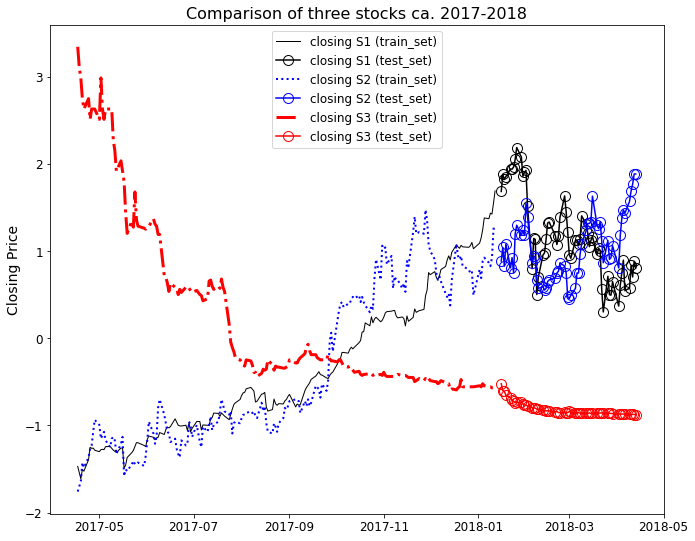

In [8]:
#
# split each series into the train / test split as before
# then plot using specific linestyles and colors
# annotate the test data using open circles
#
scale_cols = ['Close', 'Volume']
scalers = []
scaled_data = []
linestyles = ['solid', 'dotted', 'dashdot']
colors = ['black', 'blue', 'red']
figure, ax = plt.subplots(figsize = (11, 9))
for this_symbol in range(len(symbols)):
#
# scale the raw data by symbol
#
    scalers.append(StandardScaler())
    scaled_data.append(my_data.groupby('symbol').get_group(symbols[this_symbol]).copy())
    scaled_data[this_symbol].loc[:, scale_cols] = \
        scalers[this_symbol].fit_transform(scaled_data[this_symbol].loc[:, scale_cols])
#
# split the data
#
    train = scaled_data[this_symbol].loc[scaled_data[this_symbol]['Date'] <= train_end, :]
    test = scaled_data[this_symbol].loc[scaled_data[this_symbol]['Date'] > train_end, :]
#
# generate the plots
#
    ax.plot(train.Date, train.Close, 
            linestyle = linestyles[this_symbol],
            lw = this_symbol + 1,
            c = colors[this_symbol],
            label = 'closing ' + symbols[this_symbol] + ' (train_set)')
    ax.plot(test.Date, test.Close, 'o-', fillstyle = 'none', markersize = 10, 
            color = colors[this_symbol],
            label = 'closing ' + symbols[this_symbol] + ' (test_set)')
ax.legend(fontsize = 12)
ax.set_ylabel('Closing Price', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Comparison of three stocks ca. 2017-2018', 
             fontsize = 16)
plt.show()
#

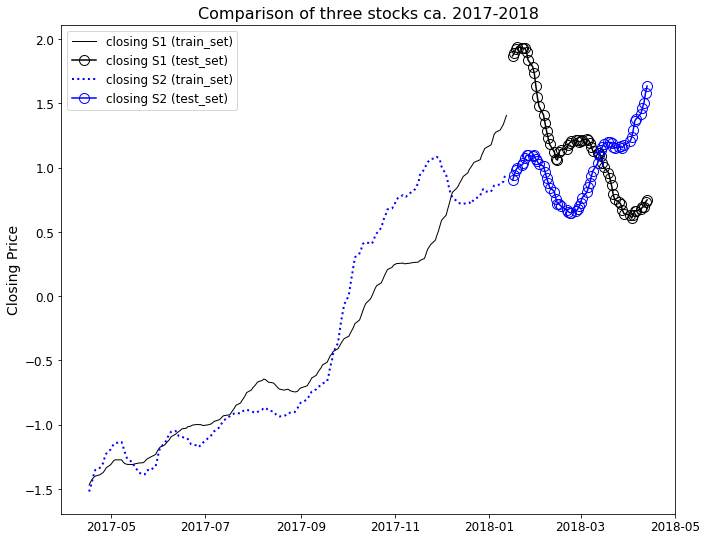

In [9]:
#
# smooth S1 and S2 and compare again
# use .rolling() with a 2-week period, centered on the date
#
fig, ax = plt.subplots(figsize = (11, 9))
for this_symbol in [0, 1]:
    train = scaled_data[this_symbol].copy().loc[scaled_data[this_symbol]['Date'] <= train_end, :]
    train.Close = train.Close.rolling(window = 14, 
                                      min_periods = 0, 
                                      center = True).mean()
    test = scaled_data[this_symbol].copy().loc[scaled_data[this_symbol]['Date'] > train_end, :]
    test.Close = test.Close.rolling(window = 14, 
                                    min_periods = 0, 
                                    center = True).mean()
    ax.plot(train.Date, train.Close, 
            linestyle = linestyles[this_symbol],
            lw = this_symbol + 1,
            c = colors[this_symbol],
            label = 'closing ' + symbols[this_symbol] + ' (train_set)')
    ax.plot(test.Date, test.Close, 'o-', fillstyle = 'none', markersize = 10, 
            color = colors[this_symbol],
            label = 'closing ' + symbols[this_symbol] + ' (test_set)')
ax.legend(fontsize = 12)
ax.set_ylabel('Closing Price', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Comparison of three stocks ca. 2017-2018', 
             fontsize = 16)
plt.show()
#